# Machine Learning in Python - Deep Learning with CNNs

Using a convolutional network fro the MNIST problem - based on [https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py](https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py)

In [1]:
import numpy as np
np.random.seed(1337)  # for reproducibility
import pandas as pd

from IPython.display import display, HTML, Image
from IPython.display import SVG

from sklearn import preprocessing 
from sklearn import metrics
from sklearn.model_selection import train_test_split

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


In [2]:
%qtconsole

## Dataset Pre-Processing

Read in the mnist dataset and prepare it for learning

In [3]:
abt = pd.read_csv("mnist_train_small.csv", encoding = "ISO-8859-1")
# Put all but the target variable into the descriptive features array
X = abt[abt.columns.difference(["value"])]
Y = abt["value"]

# Use a range scaling to scale all variables to between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()
cols = X.columns
X = pd.DataFrame(min_max_scaler.fit_transform(X), columns = cols) # Watch out for putting back in columns here

# Perfrom split to train, validation, test
x_train_plus_valid, x_test, y_train_plus_valid, y_test = train_test_split(X, Y, random_state=0, test_size = 0.30, train_size = 0.7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_plus_valid, y_train_plus_valid, random_state=0, test_size = 0.199/0.7, train_size = 0.5/0.7)

# convert to numpy arrays
x_train = x_train.as_matrix()
x_valid = x_valid.as_matrix()
x_test = x_test.as_matrix()

y_train_cat = y_train.copy()
y_valid_cat = y_valid.copy()
y_test_cat = y_test.copy()

y_train = y_train.as_matrix()
y_valid = y_valid.as_matrix()
y_test = y_test.as_matrix()

Prepare the data for input to a convolutional network

In [4]:
num_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_valid = x_valid.reshape(x_valid.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_valid.shape[0], 'valid samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (5000, 28, 28, 1)
5000 train samples
1991 valid samples
3000 test samples


## Model Building

Set up the model

In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 input_shape=input_shape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Train the model

In [8]:
batch_size = 128
epochs = 10
# epochs = 50

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_valid, y_valid))

Train on 5000 samples, validate on 1991 samples
Epoch 1/10
5000/5000 [==============================] - 5s 1ms/step - loss: 0.5757 - acc: 0.8118 - val_loss: 0.4036 - val_acc: 0.8704
Epoch 2/10
5000/5000 [==============================] - 4s 885us/step - loss: 0.4880 - acc: 0.8440 - val_loss: 0.3600 - val_acc: 0.8895
Epoch 3/10
5000/5000 [==============================] - 4s 895us/step - loss: 0.4225 - acc: 0.8686 - val_loss: 0.3236 - val_acc: 0.8990
Epoch 4/10
5000/5000 [==============================] - 4s 891us/step - loss: 0.4001 - acc: 0.8712 - val_loss: 0.3175 - val_acc: 0.8940
Epoch 5/10
5000/5000 [==============================] - 4s 884us/step - loss: 0.3700 - acc: 0.8822 - val_loss: 0.2910 - val_acc: 0.9056
Epoch 6/10
5000/5000 [==============================] - 4s 896us/step - loss: 0.3594 - acc: 0.8828 - val_loss: 0.2843 - val_acc: 0.9056
Epoch 7/10
5000/5000 [==============================] - 5s 923us/step - loss: 0.3093 - acc: 0.8974 - val_loss: 0.2553 - val_acc: 0.9161
Ep

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.228432113906
Test accuracy: 0.930333333174


Evaluate the model

In [10]:
from sklearn import metrics
print("****** Test Data ********")

# Make a set of predictions for the validation data
y_pred = model.predict_classes(np.asfarray(x_test))

# Print performance details
print(metrics.classification_report(y_test_cat, y_pred))

# Print confusion matrix
print("Confusion Matrix")
display(pd.crosstab(y_test_cat, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

****** Test Data ********
             precision    recall  f1-score   support

          0       0.93      0.97      0.95       289
          1       0.99      0.98      0.98       355
          2       0.94      0.90      0.92       303
          3       0.93      0.89      0.91       303
          4       0.89      0.93      0.91       269
          5       0.93      0.93      0.93       286
          6       0.94      0.96      0.95       310
          7       0.91      0.94      0.93       299
          8       0.90      0.92      0.91       287
          9       0.93      0.87      0.90       299

avg / total       0.93      0.93      0.93      3000

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,280,0,0,0,1,0,0,0,7,1,289
1,0,348,0,1,0,1,0,1,3,1,355
2,4,2,272,4,4,0,4,3,10,0,303
3,1,0,4,271,0,12,0,8,5,2,303
4,1,2,1,0,250,0,5,1,1,8,269
5,2,0,1,6,2,267,5,1,1,1,286
6,5,0,0,0,3,4,297,0,1,0,310
7,2,1,6,1,1,0,0,282,0,6,299
8,3,0,2,3,3,2,6,3,264,1,287


Draw the model

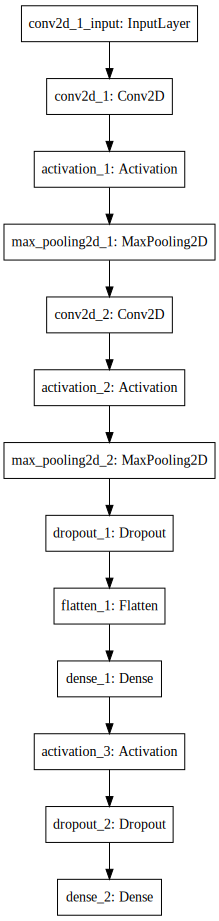

In [11]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))